In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pylab as plt
%matplotlib inline

from fiona.crs import from_epsg

In [3]:
# building foot print of NYC
Footprintsshp = gpd.GeoDataFrame.from_file('geo_export_8d9787e3-153c-4d16-9140-3caf9dafc972.shp')

In [14]:
Footprintsshp.head()

,date_lstmo,time_lstmo,cnstrct_yr,lststatype,feat_code,shape_len,bin,shape_area,heightroof,name,groundelev,doitt_id,geometry
0,2017-12-19,00:00:00.000,1993.0,Constructed,2100.0,166.785929,4441987,1089.812313,21.540000,None,70.0,1283366.0,POLYGON ((-73.81023637428498 40.72623326367575...
1,2017-08-17,00:00:00.000,1920.0,Constructed,5110.0,77.673856,4518072,329.898503,16.381832,None,6.0,964744.0,POLYGON ((-73.86002815218996 40.57354222487876...
2,2017-08-22,00:00:00.000,1940.0,Constructed,2100.0,146.929814,4299860,1234.856322,26.795523,None,8.0,547717.0,POLYGON ((-73.76711333552652 40.61130961765306...
3,2017-08-17,00:00:00.000,1930.0,Constructed,5110.0,68.476327,4516837,275.411758,11.358426,None,29.0,861127.0,POLYGON ((-73.74704802666373 40.60410892416903...
4,2017-08-22,00:00:00.000,1931.0,Constructed,2100.0,208.893121,4301765,1420.221189,26.632714,None,6.0,288652.0,POLYGON ((-73.77058283711517 40.59512166364137...


In [13]:
# convert bin number column to string for the convenience of merging
Footprintsshp.bin = Footprintsshp.bin.astype(int)

In [15]:
Footprintsshp.crs

{'init': u'epsg:4326'}

In [18]:
# Convert to foot coordinates in smaller space for merging
Footprintsshp_ft = Footprintsshp.to_crs(epsg=2263)
Footprintsshp_ft.crs

{'init': 'epsg:2263', 'no_defs': True}

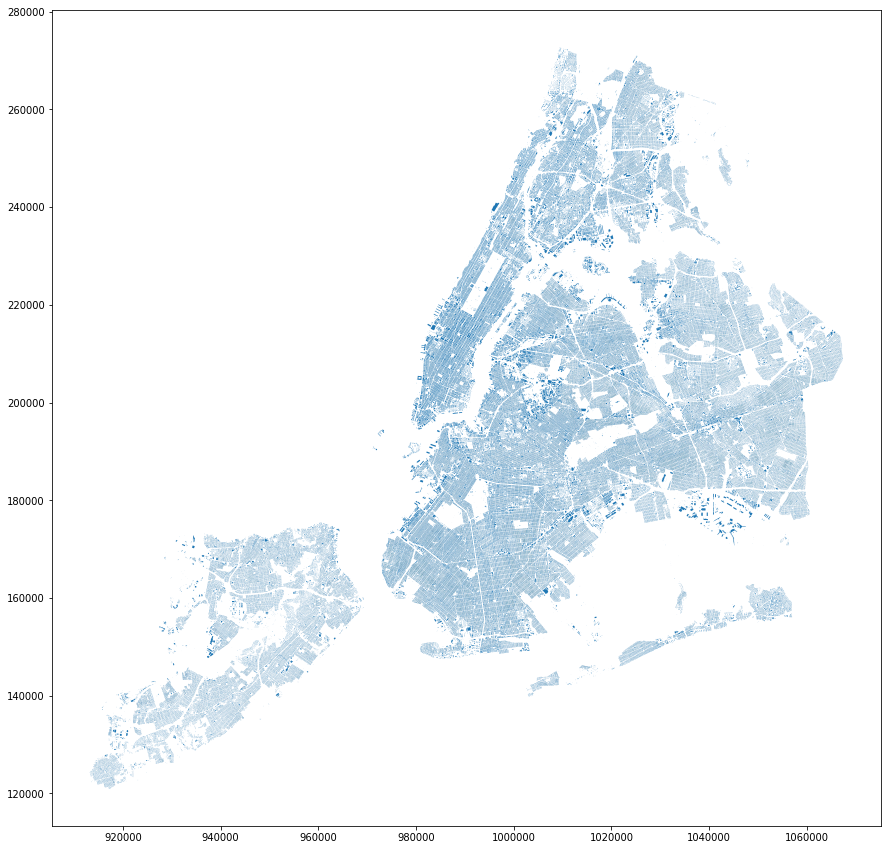

In [19]:
Footprintsshp_ft.geometry.plot(figsize=(20,15))

In [10]:
data = pd.read_csv("gas high risk 1L utility referral since Aug 2016.csv")
data.head()

,BIN Number,Complaint Number,Complaint Category,Complaint Category Description,Priority Code,Borough Digit,Borough Name,P_HOUSE_NUMBER,P_STREET_NAME,P_ZIP,...,D_MONTH,D_YEAR,INSPECTION_DATE,Inspector ID,Disposition Code,Complaint Disposition Description,cnxarraycolumn,Inspector Comments,C_NOTIFICATION_TEXT,ECB Violation Number
0,1000040,1467087,1L,GAS UTILITY REFERRAL,D,1,Manhattan,15,STONE STREET,10004,...,1,2018,1/22/2018 0:00,2744,I2,NO VIOLATION WARRANTED FOR COMPLAINT AT TIME O...,0,OPEN PLUMBING PERMIT #122639886-01-PL ON PROPE...,NaN,NaN
1,1001056,1432407,1L,GAS UTILITY REFERRAL,D,1,Manhattan,96,GREENWICH STREET,10006,...,9,2016,9/9/2016 0:00,2758,C1,INSPECTOR UNABLE TO GAIN ACCESS - 1ST ATTEMPT,0,NO ANSWER TO BELL OR KNOCKS ON DOOR; FIRST ATT...,NaN,NaN
2,1001056,1432407,1L,GAS UTILITY REFERRAL,D,1,Manhattan,96,GREENWICH STREET,10006,...,9,2016,9/13/2016 0:00,2699,C2,INSPECTOR UNABLE TO GAIN ACCESS - 2ND ATTEMPT,1,FRONT GATE LOCKED NO ACCESS,NaN,NaN
3,1001483,1455634,1L,GAS UTILITY REFERRAL,D,1,Manhattan,124,CHAMBERS STREET,10007,...,7,2017,7/31/2017 0:00,2695,A8,ECB VIOLATION SERVED,0,WORK WITHOUT A PERMIT; GAS PIPING AND FITTINGS...,NaN,35251447K
4,1001521,1465246,1L,GAS UTILITY REFERRAL,D,1,Manhattan,188,DUANE STREET,10013,...,11,2017,11/27/2017 0:00,2744,A8,ECB VIOLATION SERVED,0,I OBSERVED IN THE CELLAR NEWLY INSTALLED GAS P...,NaN,35268121L


In [3]:
data.shape

(5274, 25)

In [5]:
data.columns

Index([u'BIN Number', u'Complaint Number', u'Complaint  Category',
       u'Complaint  Category Description', u'Priority Code', u'Borough Digit',
       u'Borough Name', u'P_HOUSE_NUMBER', u'P_STREET_NAME', u'P_ZIP',
       u'P_NUMBER_OF_STORIES', u'DOF Building Classification',
       u'P_FIN_BLDG_CLASS', u'P_FIN_STORIES', u'COMPLAINT_DATE', u'D_MONTH',
       u'D_YEAR', u'INSPECTION_DATE', u'Inspector ID', u'Disposition Code',
       u'Complaint Disposition Description', u'cnxarraycolumn',
       u'Inspector Comments', u'C_NOTIFICATION_TEXT', u'ECB Violation Number'],
      dtype='object')

In [23]:
# entries that with a valid ECB violation number
ECB_violation = data.dropna(subset=['ECB Violation Number'])
ECB_violation.head()

,BIN Number,Complaint Number,Complaint Category,Complaint Category Description,Priority Code,Borough Digit,Borough Name,P_HOUSE_NUMBER,P_STREET_NAME,P_ZIP,...,D_MONTH,D_YEAR,INSPECTION_DATE,Inspector ID,Disposition Code,Complaint Disposition Description,cnxarraycolumn,Inspector Comments,C_NOTIFICATION_TEXT,ECB Violation Number
3,1001483,1455634,1L,GAS UTILITY REFERRAL,D,1,Manhattan,124,CHAMBERS STREET,10007,...,7,2017,7/31/2017 0:00,2695,A8,ECB VIOLATION SERVED,0,WORK WITHOUT A PERMIT; GAS PIPING AND FITTINGS...,NaN,35251447K
4,1001521,1465246,1L,GAS UTILITY REFERRAL,D,1,Manhattan,188,DUANE STREET,10013,...,11,2017,11/27/2017 0:00,2744,A8,ECB VIOLATION SERVED,0,I OBSERVED IN THE CELLAR NEWLY INSTALLED GAS P...,NaN,35268121L
5,1001521,1465246,1L,GAS UTILITY REFERRAL,D,1,Manhattan,188,DUANE STREET,10013,...,11,2017,11/27/2017 0:00,2744,A8,ECB VIOLATION SERVED,0,I OBSERVED IN THE CELLAR NEWLY INSTALLED GAS P...,NaN,35268122N
8,1001553,1466088,1L,GAS UTILITY REFERRAL,D,1,Manhattan,335,GREENWICH STREET,10013,...,11,2017,11/21/2017 0:00,2910,A3,FULL STOP WORK ORDER SERVED ...,0,AT TIME OF SPOT CHECK GAS ROUGHING INSPECTION ...,NaN,35251972Z
9,1001553,1466088,1L,GAS UTILITY REFERRAL,D,1,Manhattan,335,GREENWICH STREET,10013,...,12,2017,12/21/2017 0:00,2744,L2,STOP WORK ORDER FULLY RESCINDED ...,1,"APPROVED PLANS ON SITE, STOP WORK ORDER FULLY ...",NaN,35251972Z


In [26]:
# merging ECB violation data with building footprints
merged = pd.merge(Footprintsshp_ft, ECB_violation, left_on='bin', right_on='BIN Number', how='right')
merged.head()

,date_lstmo,time_lstmo,cnstrct_yr,lststatype,feat_code,shape_len,bin,shape_area,heightroof,name,...,D_MONTH,D_YEAR,INSPECTION_DATE,Inspector ID,Disposition Code,Complaint Disposition Description,cnxarraycolumn,Inspector Comments,C_NOTIFICATION_TEXT,ECB Violation Number
0,2017-08-22,00:00:00.000,1929.0,Constructed,2100.0,543.083077,3181108.0,7434.625741,68.09,None,...,2,2018,2/16/2018 0:00,2554,A8,ECB VIOLATION SERVED,0,INSTALLATION OF 3 NEW GAS COMMERCIAL DRYERS DR...,NaN,35268765R
1,2017-08-22,00:00:00.000,1929.0,Constructed,2100.0,543.083077,3181108.0,7434.625741,68.09,None,...,2,2018,2/16/2018 0:00,2554,A8,ECB VIOLATION SERVED,0,INSTALLATION OF 3 NEW GAS COMMERCIAL DRYERS DR...,NaN,35268766Z
2,2017-08-22,00:00:00.000,1929.0,Constructed,2100.0,543.083077,3181108.0,7434.625741,68.09,None,...,2,2018,2/16/2018 0:00,2554,A8,ECB VIOLATION SERVED,0,INSTALLATION OF 3 NEW GAS COMMERCIAL DRYERS DR...,NaN,35268767K
3,2017-08-22,00:00:00.000,1929.0,Constructed,2100.0,543.083077,3181108.0,7434.625741,68.09,None,...,2,2018,2/16/2018 0:00,2554,A8,ECB VIOLATION SERVED,0,INSTALLATION OF 3 NEW GAS COMMERCIAL DRYERS DR...,NaN,35268768M
4,2017-08-22,00:00:00.000,1915.0,Constructed,2100.0,142.296288,3147933.0,997.159494,26.34,None,...,10,2017,10/31/2017 0:00,2664,A8,ECB VIOLATION SERVED,0,"WORK WITHOUT A PERMIT, GAS PIPING RE-PIPED AT ...",NaN,35268130N


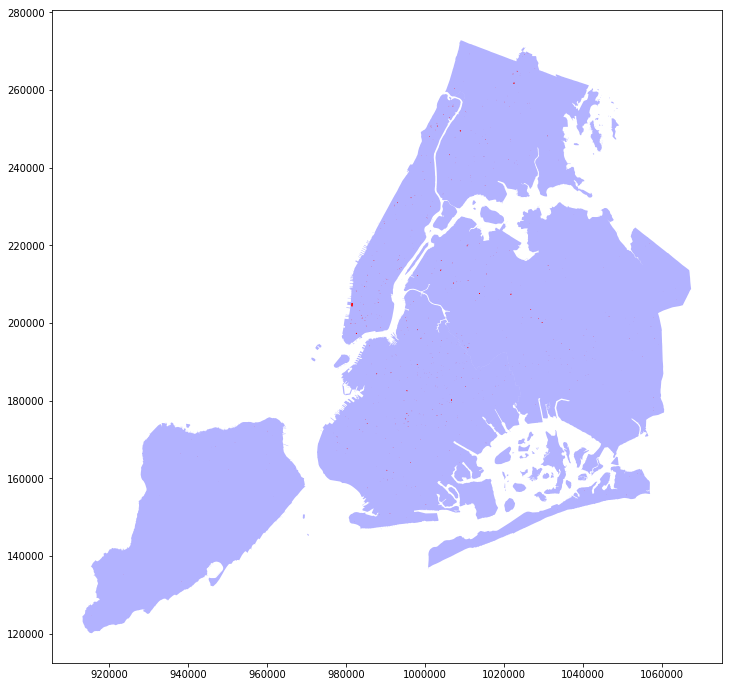

In [42]:
# plotting the geographical location of each violation against a NYC base map
fig = plt.figure(figsize=[12,12])
ax = fig.add_subplot(111)
NYC.plot(ax=ax, color='b', alpha = 0.3)
merged.plot(column='ECB Violation Number', ax=ax, color='r', alpha=1)
plt.show()

In [20]:
# to find the earliest inspection date of each complaint
first_inspect = data.groupby(['BIN Number', 'Complaint Number','Inspector Comments'])['INSPECTION_DATE'].min()
first_inspect = pd.DataFrame(first_inspect).reset_index()
first_inspect = first_inspect.drop_duplicates('Complaint Number')
first_inspect.head(10)

,BIN Number,Complaint Number,Inspector Comments,INSPECTION_DATE
0,1000040,1467087,OPEN PLUMBING PERMIT #122639886-01-PL ON PROPE...,1/22/2018 0:00
1,1001056,1432407,FRONT GATE LOCKED NO ACCESS,9/13/2016 0:00
3,1001483,1455634,WORK WITHOUT A PERMIT; GAS PIPING AND FITTINGS...,7/31/2017 0:00
4,1001521,1465246,I OBSERVED IN THE CELLAR NEWLY INSTALLED GAS P...,11/27/2017 0:00
5,1001550,1443471,ACCESS ONLY TO WINES &amp; LIQUORS STORE. NO A...,3/6/2017 0:00
7,1001553,1466088,"APPROVED PLANS ON SITE, STOP WORK ORDER FULLY ...",12/21/2017 0:00
9,1001641,1472839,VIOLATIONS ISSUED DUE TO GAS BEING SUPPLIED TO...,2/21/2018 0:00
10,1001672,1438037,MALE STATES HAS NO ACCESS TO BSMT 1ST ATTEMPT,11/28/2016 0:00
12,1001816,1465803,GAS WORK COVERED UNDER PERMIT # 122959129 AND ...,1/19/2018 0:00
14,1002123,1435673,NO ANSWER TO BELL 1ST ATTEMPT,11/23/2016 0:00


In [75]:
# number of complaint in each borough
No_of_complaint = data.drop_duplicates('Complaint Number')
No_of_complaint.groupby('Borough Name')['Complaint Number'].count()

Borough Name
Bronx            500
Brooklyn         832
Manhattan        567
Queens           714
Staten Island    131
Name: Complaint Number, dtype: int64

In [82]:
# total number of ECB Violation Number
ECB_NO = data['ECB Violation Number'].dropna().count()
ECB_NO

1481

In [43]:
# number of ECB Violation by Borough
data.groupby('Borough Name')['ECB Violation Number'].count()

Borough Name
Bronx            184
Brooklyn         569
Manhattan        282
Queens           395
Staten Island     51
Name: ECB Violation Number, dtype: int64

In [73]:
# percentage of the entries with a valid ECB Violation number
print("There are {}% of entries that have violation number".format((float(ECB_NO)/data.shape[0])*100))

There are 28.0811528252% of entries that have violation number


In [29]:
# unique values in buidling types
data['DOF Building Classification'].unique()

array(['CONDOMINIUMS:SPECIAL CONDO BILLING LOT',
       'MISCELLANEOUS STORE BUILDINGS',
       'LOFT BUILDINGS:WITH STORES OTHER THAN TYPE ONE',
       'RESIDENCE-MULTI USE:PRIMARY 3 FAMILY W STORE/OFFICE',
       'ELEVATOR APTS:ARTISTS IN RESIDENCE',
       'ELEVATOR APTS:CO-OP(OTHER THAN CONDOS)', 'ELEVATOR APTS:CONVERTED',
       'OFFICE BUILDINGS:TOWER TYPE OFFICE BUILDING',
       'WALK-UP APTS:OVER 6 FAMILIES(W STORES)',
       'SINGLE/MULT RES W/STORES/OFFICES', 'LOFT BUILDINGS:MISCELLANEOUS',
       'STORES WITH APARTMENTS ABOVE',
       'OFFICE BUILDINGS:SEMI FIREPROOF OFFICE BUILDING',
       'RESIDENCE-MULTI USE:PRIMARY 2 FAMILY W STORE/OFFICE',
       'EDUCATIONAL STRUCTURES:PUBLIC ELEM,JUNIOR,SENIOR HIGH SCHOOL',
       'WALK-UP APTS:OVER 6 FAMILIES(W/O STORES)',
       'FACTORY/INDUSTRIAL BLDGS:MISCELLANEOUS',
       'WALK-UP APTS:OLD LAW TENEMENTS',
       'STORE BUILDING: TWO STORY OR STORE/OFFICE',
       'RESIDENCE-MULTI USE:PRIMARY 5/6 FAM W STORE/OFFICE',
       'W

In [88]:
building_params = data[['Complaint Number', 'P_HOUSE_NUMBER', 'P_NUMBER_OF_STORIES', 'P_FIN_STORIES']]
building_params.head()

,Complaint Number,P_HOUSE_NUMBER,P_NUMBER_OF_STORIES,P_FIN_STORIES
0,1467087,15,5,5
1,1432407,96,35,35
2,1432407,96,35,35
3,1455634,124,6,6
4,1465246,188,4,4


In [89]:
building_params.describe()

,Complaint Number,P_NUMBER_OF_STORIES,P_FIN_STORIES
count,5.274000e+03,5274.000000,5274.000000
mean,3.320572e+06,8.509291,8.559917
std,1.234899e+06,32.887230,33.091388
min,1.429735e+06,0.000000,0.000000
25%,2.241930e+06,2.000000,2.000000
50%,3.594399e+06,2.000000,2.000000
75%,4.673803e+06,5.000000,5.000000
max,5.132963e+06,475.000000,475.000000


In [34]:
time_related = data[['Complaint Number', 'COMPLAINT_DATE', 'D_MONTH', 'D_YEAR', 'INSPECTION_DATE']]
time_related.head()

,Complaint Number,COMPLAINT_DATE,D_MONTH,D_YEAR,INSPECTION_DATE
0,1467087,12/5/2017,1,2018,1/22/2018 0:00
1,1432407,9/8/2016,9,2016,9/9/2016 0:00
2,1432407,9/8/2016,9,2016,9/13/2016 0:00
3,1455634,7/19/2017,7,2017,7/31/2017 0:00
4,1465246,11/13/2017,11,2017,11/27/2017 0:00


In [43]:
disposition = data[['Complaint Number', 'Disposition Code', 
                    'Complaint Disposition Description', 
                    'ECB Violation Number', 'Inspector Comments']]
disposition.head()

,Complaint Number,Disposition Code,Complaint Disposition Description,ECB Violation Number,Inspector Comments
0,1467087,I2,NO VIOLATION WARRANTED FOR COMPLAINT AT TIME O...,NaN,OPEN PLUMBING PERMIT #122639886-01-PL ON PROPE...
1,1432407,C1,INSPECTOR UNABLE TO GAIN ACCESS - 1ST ATTEMPT,NaN,NO ANSWER TO BELL OR KNOCKS ON DOOR; FIRST ATT...
2,1432407,C2,INSPECTOR UNABLE TO GAIN ACCESS - 2ND ATTEMPT,NaN,FRONT GATE LOCKED NO ACCESS
3,1455634,A8,ECB VIOLATION SERVED,35251447K,WORK WITHOUT A PERMIT; GAS PIPING AND FITTINGS...
4,1465246,A8,ECB VIOLATION SERVED,35268121L,I OBSERVED IN THE CELLAR NEWLY INSTALLED GAS P...
